# Sampling rasters
compare to **Extract Values to Points** in ArcGIS

In [1]:
import numpy as np
import rasterio
from functools import partial
import matplotlib.pyplot as plt
import pyproj
from GISops import project_raster, clip_raster

% matplotlib inline

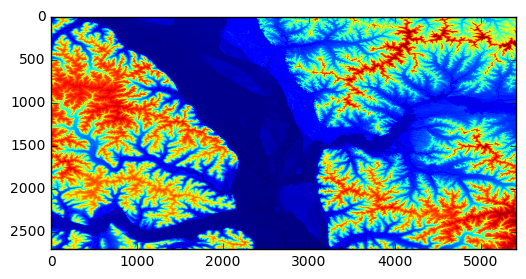

In [2]:
with rasterio.open('data/lc.tif') as src:
    img = src.read(1)
plt.imshow(img)

In [3]:
src.bounds

BoundingBox(left=-91.50000000000225, bottom=43.75027777777664, right=-90.99944444444449, top=44.000555555555515)

### Get an elevation profile for a list of points using `sample()`
more info: https://mapbox.s3.amazonaws.com/playground/perrygeo/rasterio-docs/api_docs.html#rasterio._io.RasterReader.sample

#### generate a line of points along the 43.8° parallel

In [4]:
points = list(zip(np.linspace(-91.5, -91., 1000), [43.8]*1000))

#### reproject the points to utm for plotting distance

In [5]:
pr1 = pyproj.Proj('+init=epsg:4269')
pr2 = pyproj.Proj('+init=epsg:26916')
func = partial(pyproj.transform, pr1, pr2)

points_utm = [func(*p) for p in points]
x, y = zip(*points_utm)

### sample the elevations

In [6]:
with rasterio.open('data/lc.tif') as src:
    img = src.read(1)
    elevations = list(src.sample(points))
    elevations = np.squeeze(elevations) # convert elevations to 1-D array

### make a profile with x units in miles

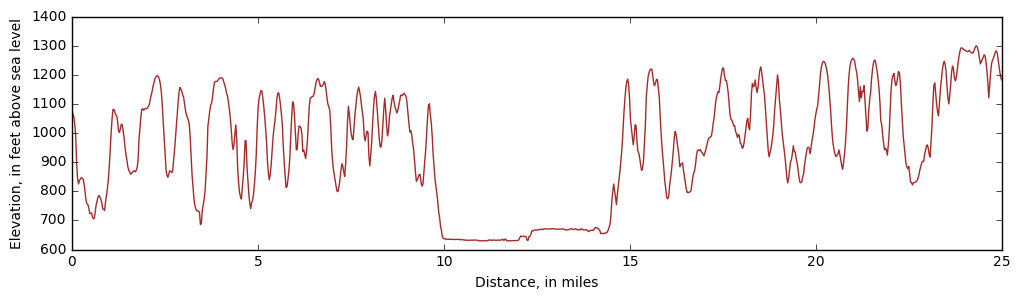

In [7]:
dist = np.array(x)
dist -= x[0]
dist_mi = dist/(.3048 * 5280)

fig, ax = plt.subplots(figsize=(12, 3))
plt.plot(dist_mi, elevations/.3048, c='brown')
ax.set_xlabel('Distance, in miles')
ax.set_ylabel('Elevation, in feet above sea level')